In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set()

In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# Reading images
import skimage.io
import skimage.transform
from PIL import Image
from scipy import ndimage

In [5]:
import tensorflow as tf
from tensorflow.python.framework import ops
from keras.preprocessing.image import ImageDataGenerator

In [6]:
import os

In [7]:
artists = pd.read_csv('/content/drive/MyDrive/project/artist_classification/copy_artist.csv')
artists.shape

(6, 8)

In [8]:
artists.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


In [9]:
artists.dtypes

id              int64
name           object
years          object
genre          object
nationality    object
bio            object
wikipedia      object
paintings       int64
dtype: object

In [10]:
artists.isna().sum()

id             0
name           0
years          0
genre          0
nationality    0
bio            0
wikipedia      0
paintings      0
dtype: int64

In [11]:
artists.groupby("nationality").sum().reset_index().sort_values("paintings",ascending=False)

<ipython-input-11-008f321b1672>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  artists.groupby("nationality").sum().reset_index().sort_values("paintings",ascending=False)


,nationality,id,paintings
0,Belgian,4,194
2,Italian,0,193
5,Spanish,5,139
4,Russian,1,88
1,French,3,73
3,Mexican,2,70


In [12]:
artists[["name","paintings"]].sort_values("paintings",ascending=False)

,name,paintings
4,Rene Magritte,194
0,Amedeo Modigliani,193
5,Salvador Dali,139
1,Vasiliy Kandinskiy,88
3,Claude Monet,73
2,Diego Rivera,70


In [13]:
pd.DataFrame(artists.genre.value_counts()).reset_index().sort_values("index")

,index,genre
0,Expressionism,1
1,"Expressionism,Abstractionism",1
3,Impressionism,1
2,"Social Realism,Muralism",1
5,Surrealism,1
4,"Surrealism,Impressionism",1


In [14]:
artists2=artists.copy()

In [15]:
dct_genre={"Abstract Expressionism":"Expressionism","Surrealism,Impressionism":"Surrealism","Early Renaissance":"Renaissance","Expressionism,Abstractionism" :"Expressionism","Expressionism,Abstractionism,Surrealism":"Expressionism","High Renaissance":"Renaissance","High Renaissance,Mannerism":"Renaissance","Impressionism,Post-Impressionism":"Impressionism","Northern Renaissance":"Renaissance","Primitivism,Surrealism":"Primitivism","Proto Renaissance":"Renaissance","Realism,Impressionism":"Realism","Social Realism,Muralism":"Realism"," Symbolism,Art Nouveau":"Symbolism","Symbolism,Expressionism":"Symbolism","Symbolism,Post-Impressionism":"Symbolism","Symbolism,Art Nouveau":"Symbolism"}


In [16]:
artists2.genre=artists2.genre.map(dct_genre).fillna(artists2.genre)

In [17]:
pd.DataFrame(artists2.genre.value_counts()).reset_index().sort_values("index")

,index,genre
0,Expressionism,2
3,Impressionism,1
2,Realism,1
1,Surrealism,2


In [18]:
artists2

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,Expressionism,Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,Realism,Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,Surrealism,Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194
5,5,Salvador Dali,1904 - 1989,Surrealism,Spanish,Salvador Domingo Felipe Jacinto Dalí i Domènec...,http://en.wikipedia.org/wiki/Salvador_Dalí,139


In [19]:
artists2.groupby('genre').sum().sort_values("paintings",ascending=False).reset_index()

<ipython-input-19-e2ff2a766cbe>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  artists2.groupby('genre').sum().sort_values("paintings",ascending=False).reset_index()


,genre,id,paintings
0,Surrealism,9,333
1,Expressionism,1,281
2,Impressionism,3,73
3,Realism,2,70


<ipython-input-20-727ec202445a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.barplot(data=artists2.groupby('genre').sum().sort_values("paintings",ascending=False).reset_index(),x="genre",y="paintings")


Text(0.5, 1.0, 'Ranking of number of paintings per genre')

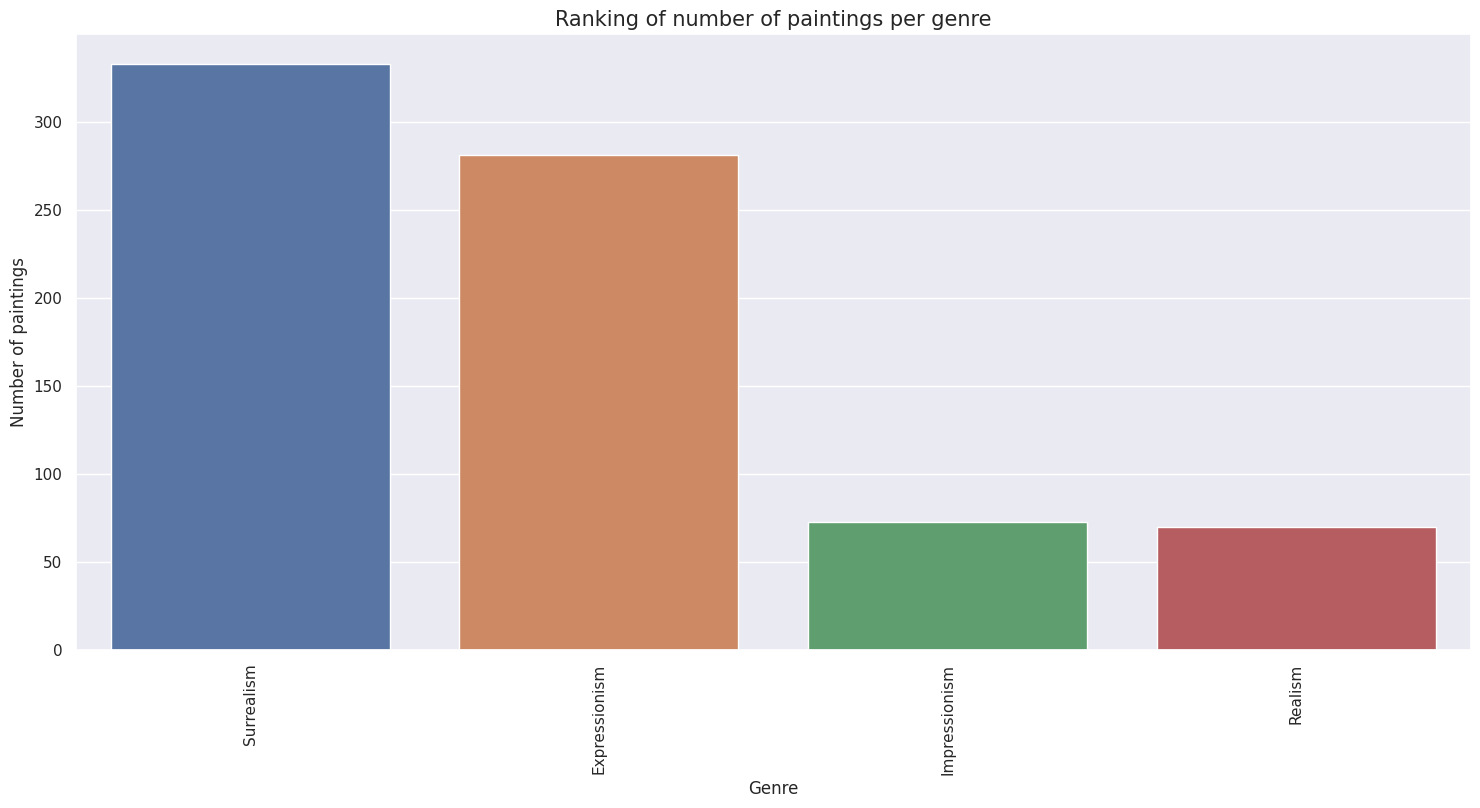

In [20]:
plt.figure(figsize=(18,8))
sns.barplot(data=artists2.groupby('genre').sum().sort_values("paintings",ascending=False).reset_index(),x="genre",y="paintings")
plt.xlabel("Genre")
plt.ylabel("Number of paintings")
plt.xticks(rotation='vertical')
plt.title("Ranking of number of paintings per genre",fontsize=15)

In [21]:
genre=list(artists2.genre.unique())
genre

['Expressionism', 'Realism', 'Impressionism', 'Surrealism']

In [22]:
artists2.loc[artists2.genre == "Renaissance"]

,id,name,years,genre,nationality,bio,wikipedia,paintings


In [23]:
images_dir = '/content/drive/MyDrive/project/artist_classification/images'
artists_dirs = os.listdir(images_dir)
artists_top_name = artists2['name'].str.replace(' ', '_').values
artists_top_genre = artists2['genre'].values

# See if all directories exist
for name in artists_top_name:
    if os.path.exists(os.path.join(images_dir, name)):
        print("Found -->", os.path.join(images_dir, name))
    else:
        print("Did not find -->", os.path.join(images_dir, name))

Found --> /content/drive/MyDrive/project/artist_classification/images/Amedeo_Modigliani
Found --> /content/drive/MyDrive/project/artist_classification/images/Vasiliy_Kandinskiy
Found --> /content/drive/MyDrive/project/artist_classification/images/Diego_Rivera
Found --> /content/drive/MyDrive/project/artist_classification/images/Claude_Monet
Found --> /content/drive/MyDrive/project/artist_classification/images/Rene_Magritte
Found --> /content/drive/MyDrive/project/artist_classification/images/Salvador_Dali


In [24]:
artists2.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,Expressionism,Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,Realism,Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,Surrealism,Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


In [25]:
genre

['Expressionism', 'Realism', 'Impressionism', 'Surrealism']

In [26]:

dct_artist=dict(zip(artists_top_name.tolist(),list(artists2.genre)))

In [27]:
os.listdir()

['.config', 'drive', 'sample_data']

In [28]:
os.chdir('/content/drive/MyDrive/project/artist_classification/images/')

In [29]:
for i in os.listdir():
    for j in os.listdir(i):
        load_img_rz = np.array(Image.open(r'/content/drive/MyDrive/project/artist_classification/images/'+str(i)+"/"+str(j)).resize((100,100)))
        Image.fromarray(load_img_rz).save(r'/content/drive/MyDrive/project/artist_classification/images/'+str(i)+'/'+str(j))

In [30]:
from PIL import Image

def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32")
    return data

In [31]:
X_list1=[]
X_list2=[]
index1=[]
for i in os.listdir("/content/drive/MyDrive/project/artist_classification/images"):

    for j in os.listdir(os.path.join("/content/drive/MyDrive/project/artist_classification/images", i)):

        #'C:/Users/Camille/Documents/Ecole/Ironhack/Week 9/Final Project/Trying/Baroque/Caravaggio_1.jpg'
        result = load_image(r'/content/drive/MyDrive/project/artist_classification/images/'+(i)+'/'+(j))
        if result.shape != (100, 100,3):
            index1.append(j)
            X_list1.extend([result])

        else:
            X_list2.extend([result])

In [32]:
X=np.array(X_list2)

In [33]:
X.shape

(239, 100, 100, 3)

In [34]:
dct_images={j:i for i in os.listdir() if '.' not in i for j in os.listdir(i) if j.endswith("jpg") if j not in index1 }


In [35]:

class_names=genre

In [36]:
dct_class={"Expressionism":0,"Realism":1,"Impressionism":2,"Surrealism":3,"Byzantine Art":4,"Post-Impressionism":5,"Symbolism":6,"Renaissance":7,"Suprematism":8,"Cubism":9,"Baroque":10,"Romanticism":11,"Primitivism":12,"Mannerism":13,"Neoplasticism":14,"Pop Art":15}


In [37]:
y_df=pd.DataFrame(list(dct_images.values()),columns=["Genre"])
y_df

,Genre
0,Vasiliy_Kandinskiy
1,Vasiliy_Kandinskiy
2,Vasiliy_Kandinskiy
3,Vasiliy_Kandinskiy
4,Vasiliy_Kandinskiy
...,...
234,Jackson Pollock
235,Jackson Pollock
236,Jackson Pollock
237,Jackson Pollock


In [38]:
y_df

,Genre
0,Vasiliy_Kandinskiy
1,Vasiliy_Kandinskiy
2,Vasiliy_Kandinskiy
3,Vasiliy_Kandinskiy
4,Vasiliy_Kandinskiy
...,...
234,Jackson Pollock
235,Jackson Pollock
236,Jackson Pollock
237,Jackson Pollock


In [39]:
y=np.array(list(y_df.Genre))

In [40]:
y

array(['Vasiliy_Kandinskiy', 'Vasiliy_Kandinskiy', 'Vasiliy_Kandinskiy',
       'Vasiliy_Kandinskiy', 'Vasiliy_Kandinskiy', 'Salvador_Dali',
       'Salvador_Dali', 'Salvador_Dali', 'Salvador_Dali', 'Salvador_Dali',
       'Rene_Magritte', 'Rene_Magritte', 'Rene_Magritte', 'Rene_Magritte',
       'Rene_Magritte', 'Claude_Monet', 'Claude_Monet', 'Claude_Monet',
       'Claude_Monet', 'Claude_Monet', 'Diego_Rivera', 'Diego_Rivera',
       'Diego_Rivera', 'Diego_Rivera', 'Diego_Rivera',
       'Amedeo_Modigliani', 'Amedeo_Modigliani', 'Amedeo_Modigliani',
       'Amedeo_Modigliani', 'Amedeo_Modigliani', 'Edouard Manet',
       'Edouard Manet', 'Edouard Manet', 'Edouard Manet', 'Edouard Manet',
       'Andrei Rublev', 'Andrei Rublev', 'Andrei Rublev', 'Andrei Rublev',
       'Andrei Rublev', 'Vincent van Gogh', 'Vincent van Gogh',
       'Vincent van Gogh', 'Vincent van Gogh', 'Vincent van Gogh',
       'Gustav Klimt', 'Gustav Klimt', 'Gustav Klimt', 'Gustav Klimt',
       'Gustav Klimt', 

In [41]:
X_train, X_test, y_train, y_test=train_test_split(X,y)

In [42]:
X_train = X_train / 255.0

X_test = X_test / 255.0

In [43]:
X_train

array([[[[0.25882353, 0.30588235, 0.26666667],
         [0.20784314, 0.25490196, 0.21568627],
         [0.22745098, 0.2745098 , 0.23529412],
         ...,
         [0.28627451, 0.31372549, 0.25098039],
         [0.30588235, 0.33333333, 0.27058824],
         [0.29411765, 0.32156863, 0.25882353]],

        [[0.23137255, 0.27058824, 0.23529412],
         [0.17254902, 0.21960784, 0.18039216],
         [0.18823529, 0.23529412, 0.19607843],
         ...,
         [0.21568627, 0.24313725, 0.18039216],
         [0.25098039, 0.27843137, 0.21568627],
         [0.25098039, 0.27843137, 0.21568627]],

        [[0.21176471, 0.23921569, 0.21176471],
         [0.14509804, 0.18431373, 0.15294118],
         [0.15294118, 0.19215686, 0.16078431],
         ...,
         [0.14901961, 0.17254902, 0.11764706],
         [0.20392157, 0.22745098, 0.17254902],
         [0.22352941, 0.24705882, 0.19215686]],

        ...,

        [[0.25882353, 0.25882353, 0.15686275],
         [0.47843137, 0.47843137, 0.38431373]

In [44]:
y_train_df=pd.DataFrame(list(y_train),columns=["genre"])
y_train_df.genre.value_counts()

Rembrandt                    5
Georges Seurat               5
Jan van Eyck                 5
Gustav Klimt                 5
Diego Velazquez              5
Titian                       5
Henri de Toulouse-Lautrec    5
Joan Miro                    5
Salvador_Dali                5
Marc Chagall                 5
Henri Rousseau               5
Piet Mondrian                5
Eugene Delacroix             5
Michelangelo                 5
Pierre-Auguste Renoir        4
Edgar Degas                  4
Leonardo da Vinci            4
Henri Matisse                4
Caravaggio                   4
Andy Warhol                  4
Edvard Munch                 4
Amedeo_Modigliani            4
Paul Cezanne                 4
William Turner               4
Pieter Bruegel               4
Jackson Pollock              4
Giotto di Bondone            4
Pablo Picasso                4
Andrei Rublev                4
Gustave Courbet              3
Francisco Goya               3
Kazimir Malevich             3
Paul Kle

In [45]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(100, 100,3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(48)
])

In [46]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y_train = label.fit_transform(y_train)
y_test = label.fit_transform(y_test)

In [48]:
print(X_train.shape,y_train.shape)

(179, 100, 100, 3) (179,)


In [49]:
y_train

array([33, 43, 14, 24, 13, 32, 38, 45,  2, 16, 35, 29, 13, 19,  6, 16, 31,
       19, 15, 17, 44, 13, 24, 29,  4, 38, 33,  0, 40, 39, 47, 38,  6, 10,
       41, 30, 47,  2, 41, 25, 18,  7, 44,  5, 18, 47, 43, 39, 29, 20, 22,
       28, 43, 28, 31,  8,  5, 19, 46, 26, 33, 23, 34, 35, 22, 43,  8, 37,
       44, 21, 26, 34,  9,  2, 22, 20,  3, 38, 31, 14, 26, 18, 11, 25, 23,
       40,  9, 11, 30, 27, 35,  7, 36, 18, 20, 23, 24, 16,  7, 16, 44,  1,
       46,  1, 16,  1, 44,  9, 15, 30, 32, 18,  7, 40, 41, 26, 30, 30, 15,
       14, 26, 25, 34, 37, 13, 28, 39,  6, 43, 22, 41, 25, 20, 13, 37, 17,
        5, 22, 29, 32, 39, 29, 17,  4, 41, 32,  2, 47, 21, 45,  9,  7, 12,
       38, 33, 28, 42, 37,  1, 21, 12, 21, 42, 27,  3, 46, 17,  5, 24,  4,
       11, 11,  3, 21, 42,  8,  3, 25, 27])

In [50]:
model.fit(X_train, y_train,validation_split=0.2, epochs=10)

Epoch 1/10
5/5 [==============================] - 1s 112ms/step - loss: 14.5019 - accuracy: 0.0070 - val_loss: 14.3511 - val_accuracy: 0.0278
Epoch 2/10
5/5 [==============================] - 0s 61ms/step - loss: 13.5904 - accuracy: 0.0210 - val_loss: 14.7991 - val_accuracy: 0.0278
Epoch 3/10
5/5 [==============================] - 0s 67ms/step - loss: 13.6433 - accuracy: 0.0210 - val_loss: 14.7967 - val_accuracy: 0.0278
Epoch 4/10
5/5 [==============================] - 0s 63ms/step - loss: 13.6418 - accuracy: 0.0210 - val_loss: 14.7966 - val_accuracy: 0.0278
Epoch 5/10
5/5 [==============================] - 0s 60ms/step - loss: 13.6418 - accuracy: 0.0210 - val_loss: 14.7966 - val_accuracy: 0.0278
Epoch 6/10
5/5 [==============================] - 0s 62ms/step - loss: 13.6418 - accuracy: 0.0210 - val_loss: 14.7966 - val_accuracy: 0.0278
Epoch 7/10
5/5 [==============================] - 0s 57ms/step - loss: 13.6418 - accuracy: 0.0210 - val_loss: 14.7966 - val_accuracy: 0.0278
Epoch 8/10
5

In [51]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

2/2 - 0s - loss: 12.1103 - accuracy: 0.0333 - 39ms/epoch - 19ms/step

Test accuracy: 0.03333333507180214
